In [6]:
import pandas as pd
import seaborn as sns
import json
import os
import sys
sys.path.append("..")

/home/eraldo/miniconda2/envs/pytorch/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
def linear_dict(d, prefix="", new_d=None):
    if new_d is None:
        new_d = {}
    for k, v in d.items():
        if isinstance(v, dict):
            linear_dict(v, prefix + k + "_", new_d)
        else:
            new_d[prefix + k] = v
    return new_d

def linear_dicts_from_file(f_name):
    dicts = []
    with open(f_name) as f:
        for line in f:
            d = json.loads(line)
            dicts.append(linear_dict(d))
    return dicts

def stack_dfs_subdirs(path, f_name):
    ds = []
    for d in os.listdir(path):
        if os.path.isdir(os.path.join(path, d)):
            ds.extend(linear_dicts_from_file(os.path.join(path, d, f_name)))
    return pd.DataFrame(ds)

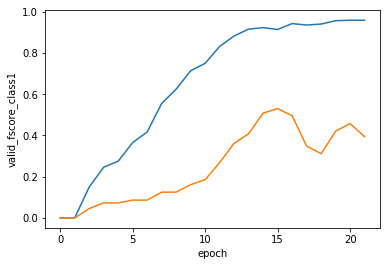

In [8]:
df = pd.DataFrame(linear_dicts_from_file("../results/out_train_20191117-132643-502882/res_perepoch.json"))
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

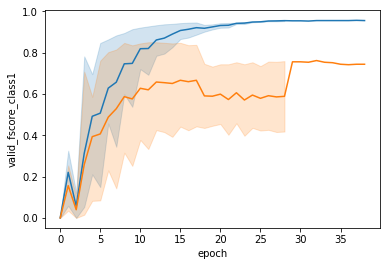

In [9]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191117-133638-247354/", "res_perepoch.json")
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

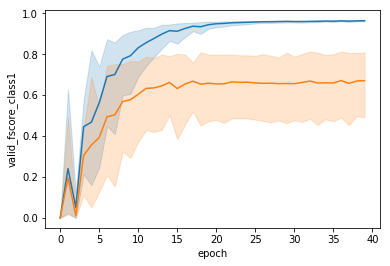

In [10]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191117-140652-228326/", "res_perepoch.json")
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

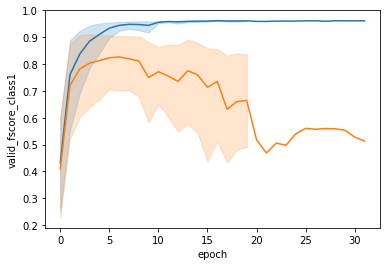

In [11]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191117-151929-417480/", "res_perepoch.json")
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

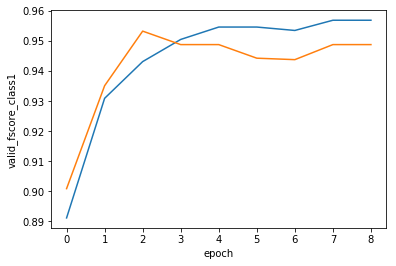

In [12]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191117-151929-417480/", "res_perepoch.json")
idx = df["valid_fscore_class1"].idxmax()
split = df.iloc[idx].split
df_max = df[df.split == split]
sns.lineplot(x="epoch", y="train_fscore_class1", data=df_max)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df_max)

In [13]:
df.max()

split                     10.000000
improved                   1.000000
epoch                     31.000000
iteration              75104.000000
train_accuracy             0.985513
train_fscore_class1        0.963203
valid_accuracy             0.981261
valid_fscore_class1        0.953191
dtype: float64

In [14]:
df.iloc[df.valid_fscore_class1.idxmax()]

split                        10
improved                   True
epoch                         2
iteration                  7041
train_accuracy         0.977418
train_fscore_class1    0.943072
valid_accuracy         0.981261
valid_fscore_class1    0.953191
Name: 22, dtype: object

In [15]:
df.iloc[df.valid_fscore_class1.idxmin()]

split                         1
improved                  False
epoch                         0
iteration                  2347
train_accuracy         0.791223
train_fscore_class1           0
valid_accuracy         0.805792
valid_fscore_class1           0
Name: 39, dtype: object

In [16]:
df.iloc[df.groupby("split")["valid_fscore_class1"].idxmax()]

,split,improved,epoch,iteration,train_accuracy,train_fscore_class1,valid_accuracy,valid_fscore_class1
64,1,True,25,61022,0.984235,0.960764,0.844974,0.560386
86,2,True,6,16429,0.976566,0.939092,0.889267,0.694836
97,3,True,4,11735,0.972731,0.931034,0.948893,0.873950
13,4,True,13,32858,0.984235,0.959474,0.940375,0.852321
129,5,True,10,25817,0.983383,0.958555,0.955707,0.877358
112,6,True,8,21123,0.984235,0.959826,0.964225,0.913580
138,7,True,2,7041,0.976140,0.938865,0.967632,0.917031
73,8,True,2,7041,0.977418,0.941822,0.967632,0.922449
32,9,True,3,9388,0.980401,0.951579,0.981261,0.946341
22,10,True,2,7041,0.977418,0.943072,0.981261,0.953191


## Balanced Batches
Cada batch contém o mesmo número de exemplos positivos e negativos.

**Aparentemente, isto acelerou bastante a convergência do treino.**

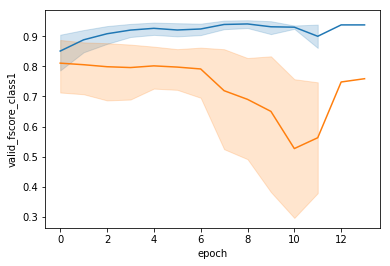

In [17]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191124-215616-259650/", "res_perepoch.json")
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

## Stratified Splits
Além de usar balanced batches,
    usamos também splits estratificados, isto é,
        durante a geração dos splits train/valid,
            a proporção entre as classes é mantida.
          
Isto não parece ter afetado os resultados.   

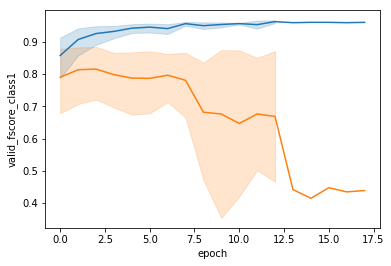

In [18]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191124-224054-548909/", "res_perepoch.json")
sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)

## num_splits: 20

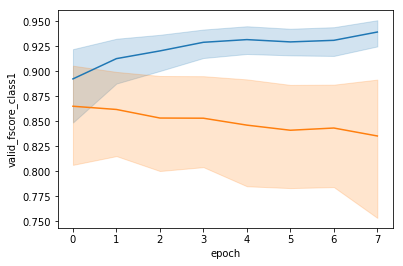

In [19]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191125-062616-384150/", "res_perepoch.json")

# find max epoch for which at least half of the splits have run to
epoch_max = df.epoch.max()
dfs = []
gby = df.groupby("split")
for epoch_up in range(epoch_max):
    if (gby.epoch.max() > epoch_up).sum() < epoch_max / 2:
        break

sns.lineplot(x="epoch", y="train_fscore_class1", data=df[df.epoch <= epoch_up])
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df[df.epoch <= epoch_up])

## num_splits: 20 (outra run)

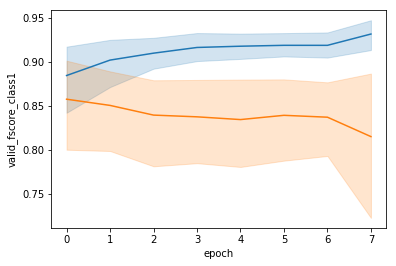

In [20]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191125-082554-475066/", "res_perepoch.json")

# find max epoch for which at least half of the splits have run to
epoch_max = df.epoch.max()
dfs = []
gby = df.groupby("split")
for epoch_up in range(epoch_max):
    if (gby.epoch.max() > epoch_up).sum() < epoch_max / 2:
        break

sns.lineplot(x="epoch", y="train_fscore_class1", data=df[df.epoch <= epoch_up])
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df[df.epoch <= epoch_up])

## Stratified Splits w/out Balanced Sampler
Neste experimento,
    usamos splits estratificados
        mas não usamos o balanced sampler.
Foram executadas 20 runs.

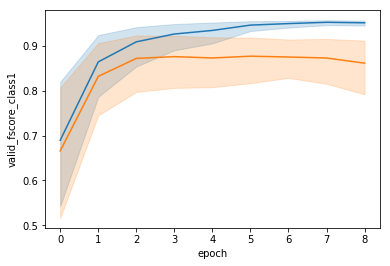

In [21]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191125-095226-007125/", "res_perepoch.json")

# find max epoch for which at least half of the splits have run to
epoch_max = df.epoch.max()
dfs = []
gby = df.groupby("split")
for epoch_up in range(epoch_max):
    if (gby.epoch.max() > epoch_up).sum() < epoch_max / 2:
        break

sns.lineplot(x="epoch", y="train_fscore_class1", data=df[df.epoch <= epoch_up])
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df[df.epoch <= epoch_up])

In [22]:
import torch

a = torch.Tensor([1,1,1,1])
b = torch.Tensor([2,2,2,2])
c = torch.Tensor([3,3,3,3])

display(torch.stack((a, b, c), dim=1))
display(torch.stack((a, b, c), dim=1).view(-1,)) #.view(2, 4).t().contiguous().view(2, 4)

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

tensor([1., 2., 3., 1., 2., 3., 1., 2., 3., 1., 2., 3.])

## Stratified Batch Sampler
Neste experimento,
    usamos um stratified batch sample, ou seja,
        cada batch do treinamento tem a mesma proporção de classes do split de treino todo.
Foram executadas 20 runs.

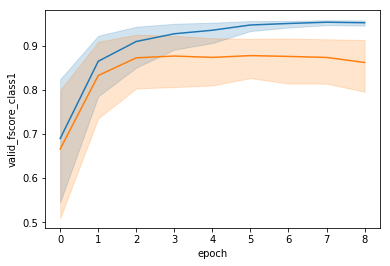

In [31]:
df = stack_dfs_subdirs("../results/out_cv_shuffle_split_20191125-095226-007125/", "res_perepoch.json")

# find max epoch for which at least half of the splits have run to
epoch_max = df.epoch.max()
dfs = []
gby = df.groupby("split")
for epoch_up in range(epoch_max):
    if (gby.epoch.max() > epoch_up).sum() < epoch_max / 2:
        break

df = df[df.epoch <= epoch_up]

sns.lineplot(x="epoch", y="train_fscore_class1", data=df)
sns.lineplot(x="epoch", y="valid_fscore_class1", data=df)